In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:

# sklearn packages (for pre-processing, model-building, evaluators, cross-validators, etc.)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import OneHotEncoder

In [6]:

## xgboost packages
import xgboost as xgb
from xgboost import XGBClassifier


In [ ]:
cct_init = pd.read_parquet("/home/onyxia/work/df_cct_final.parquet")


In [25]:
df_cct = pd.read_parquet("/home/onyxia/work/df_cct_2016.parquet")
df_index = df_cct.reset_index()
df_cct.reset_index(inplace=True, drop=True)


In [26]:
df_cct

,User,Card,Month,Day,Hours,year_diff,Amount,Use Chip,Card Brand,Card Type,...,nb_daily_declines_card,nb_monthly_declines_card,bad_pin,insufficient_balance,hr_nbt/last_30d_av_hr_nbt,day_nbt/last_30d_av_day_nbt,last_3d_amt/nbt,label_global,Is Fraud?,pos_amount
0,0,1,-1.000000,-1.000000,0.000000,0.00,0.642585,Chip Transaction,Visa,Debit,...,0.0,-0.5,0,0,-0.131161,0.256666,1.023525,0,0,1
1,0,1,-1.000000,-1.000000,1.428571,0.00,-0.052335,Chip Transaction,Visa,Debit,...,0.0,-0.5,0,0,-0.107740,0.249094,0.562979,0,0,1
2,0,3,-1.000000,-1.000000,2.000000,0.25,0.270664,Swipe Transaction,Visa,Credit,...,0.0,1.0,0,0,-0.175077,-0.553276,0.387920,0,0,1
3,0,1,-1.000000,-0.933333,0.000000,0.00,-0.366460,Chip Transaction,Visa,Debit,...,0.0,-0.5,0,0,-0.107740,-0.433070,0.189027,1,0,1
4,0,1,-1.000000,-0.866667,0.000000,0.00,0.593322,Chip Transaction,Visa,Debit,...,0.0,-0.5,0,0,1.379068,0.891131,0.111384,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214332,1999,1,-0.833333,0.800000,0.916667,1.00,0.059421,Chip Transaction,Visa,Credit,...,0.0,0.0,0,0,2.665306,1.144988,0.221986,0,0,0
7214333,1999,1,-0.833333,0.800000,0.916667,1.00,0.059421,Chip Transaction,Visa,Credit,...,0.0,0.0,0,0,2.622500,1.131036,0.198821,0,0,1
7214334,1999,1,-0.833333,0.866667,-0.333333,1.00,0.260751,Chip Transaction,Visa,Credit,...,0.0,0.0,0,0,0.099149,-0.722775,-0.256704,0,0,1
7214335,1999,1,-0.833333,0.866667,0.750000,1.00,-0.365911,Chip Transaction,Visa,Credit,...,0.0,0.0,0,0,0.096847,-0.730202,-0.288962,0,0,1


In [10]:
df_cct.columns

Index(['User', 'Card', 'Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Use Chip', 'Card Brand', 'Card Type', 'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?', 'pos_amount'],
      dtype='object')

In [27]:
df_cct["pos_amount"] = df_cct["Amount"].apply(lambda x: 1 if x >= 0 else 0)

In [28]:
df_cct["Amount"] = df_cct["Amount"].abs()

In [29]:
df_cct["Amount"].min()

0.0

### Encode categorical variables

In [30]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [31]:
# Pour "Card Brand":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Card Brand"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [32]:
# Pour "Card Type"":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Card Type"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [33]:
# Pour "label global"":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["label_global"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [34]:
df_cct.rename(columns={0:"0", -1: "-1", 1:"1", 2:"2", 3: "3", 4:"4", 5:"5", 6:"6"}, inplace=True)

In [35]:
df_cct.columns

Index(['User', 'Card', 'Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Use Chip', 'Card Brand', 'Card Type', 'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?', 'pos_amount', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction', 'Amex', 'Discover', 'Mastercard', 'Visa', 'Credit',
       'Debit', 'Debit (Prepaid)', '-1', '0', '1', '2', '3', '4', '5', '6'],
      dtype='object')

### Create train/val/test datasets

In [36]:
# selecting features
# dropped card, nb_weekly_declines, day_of_week, nb_daily_declines, credit, debit, amex,  discover,
# mastercard, visa
features = ['Month', 'Day', 'Hours', 'year_diff', 'Amount', 'pos_amount',
       'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction','Debit (Prepaid)',"Is Fraud?",
        "-1","0","1","2","3","4","5","6"]
df_selec = df_cct[features] # 21 features + clusters
X = df_selec[['Month', 'Day', 'Hours', 'year_diff', 'Amount', 'pos_amount',
       'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction','Debit (Prepaid)',"-1","0","1","2","3","4","5","6"]]
y = df_selec["Is Fraud?"]

In [37]:
## Splitting the data into train and test data  (70:30)

## Create a STRATIFIED train-test (Hence, passing the argument 'stratify= y')
# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, random_state = 0, stratify = y)


In [38]:
df_train = df_selec.loc[X_train.index]

In [39]:
## Checking class distribution in stratified train-test split
from collections import Counter

print("In y dataset:", Counter(y))
print("\nIn y_train set:", Counter(y_train))
print("\nIn y_test set:", Counter(y_test))

In y dataset: Counter({0: 7205925, 1: 8412})

In y_train set: Counter({0: 5044147, 1: 5888})

In y_test set: Counter({0: 2161778, 1: 2524})


## Model Building perso

In [40]:
#Create a pandas dataframe to store model results
results_df = pd.DataFrame(columns=['Data Handling Technique','Model', 'Precision','Recall','F1 score', "Our Score"])

In [55]:
# opening raw cct file
#cct_init = pd.read_parquet("/home/onyxia/work/df_cct.parquet")
cct_init = pd.read_parquet("/home/onyxia/work/df_cct_2016.parquet")


#building our own score
def our_score(clf, X, y):

    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    fp_rows = []

    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y.values[i] == 0:
            fp_rows.append(y.index[i])

    fn_rows = []

    for i in range(len(y_pred)):
        if y_pred[i] == 0 and y.values[i] == 1:
            fn_rows.append(y.index[i])

    tp_rows = []

    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y.values[i] == 1:
            tp_rows.append(y.index[i])

    tn_rows = []

    for i in range(len(y_pred)):
        if y_pred[i] == 0 and y.values[i] == 0:
            tn_rows.append(y.index[i])

    df_fp = cct_init.loc[fp_rows]
    fp_new = df_fp.loc[df_fp["Amount"]>=15].index

    df_tp = cct_init.loc[tp_rows]
    tp_new = df_tp.loc[df_tp["Amount"]>=15].index

    df_fn = cct_init.loc[fn_rows]
    fn_new = df_fn.loc[df_fn["Amount"]>=15].index

    ourscore = -15*(len(fp_new) + len(tp_new)) + cct_init.loc[tp_new].Amount.sum() - cct_init.loc[fn_rows].Amount.sum() - cct_init.loc[tp_rows].Amount.sum()

    ourscore_norm = (ourscore + cct_init.loc[fn_rows].Amount.sum() + cct_init.loc[tp_rows].Amount.sum())/(cct_init.loc[tp_new].Amount.sum()+cct_init.loc[fn_new].Amount.sum() - 15*(len(tp_new)+len(fn_new)))

    return ourscore_norm

In [41]:
# plot confusion matrix
def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=['Non-Fraudulent','Fraudulent']
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize= 10)
    plt.xlabel('Predicted label', fontsize=10)


def print_model_metrics(y_test,y_pred):
    print(" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cp)
    plt.show()


In [42]:
## Define a function to plot ROC_AUC curve
def plot_roc_auc_curve(fpr, tpr, roc_auc):
    print(f"ROC for test dataset {round(roc_auc*100,3)}%")  
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr,tpr,'b',label="Test ROC_AUC="+str(round(roc_auc,3)))
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.legend(loc='lower right')
    plt.show()


## XGBOOST

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### GridSearchCV

In [44]:
default_model = XGBClassifier( objective= 'binary:logistic',random_state=0 ) 

In [47]:
#with a very restricted map
from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate":[0.01,0.1],  
    'max_depth': [1,10], }
grid_search = GridSearchCV(default_model, param_grid, cv = 3, scoring = 'roc_auc') 
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 10]},
             scoring='roc_auc')

In [49]:
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 10}
Meilleur score : 0.8887878056499995


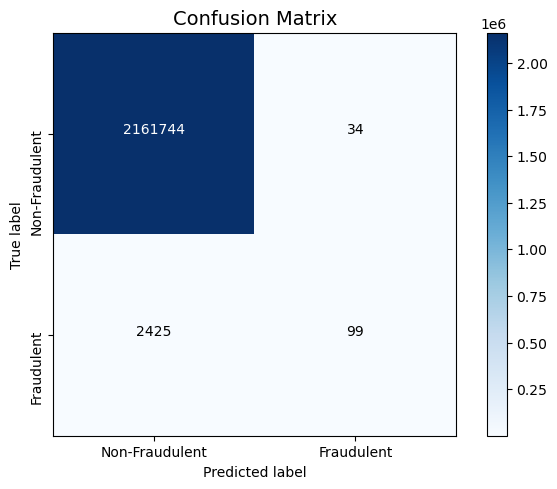

In [53]:
xgbopti = XGBClassifier(random_state=0, learning_rate = 0.1, max_depth = 10, objective= 'binary:logistic')
xgbopti.fit(X_train, y_train)
y_pred = xgbopti.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [63]:
accuracy = accuracy_score(y_test, y_pred>0.5)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1, recall, precision,accuracy

(0.07452013549115544,
 0.03922345483359747,
 0.7443609022556391,
 0.9988638369321842)

Text(0.5, 0, 'False Positive Rate')

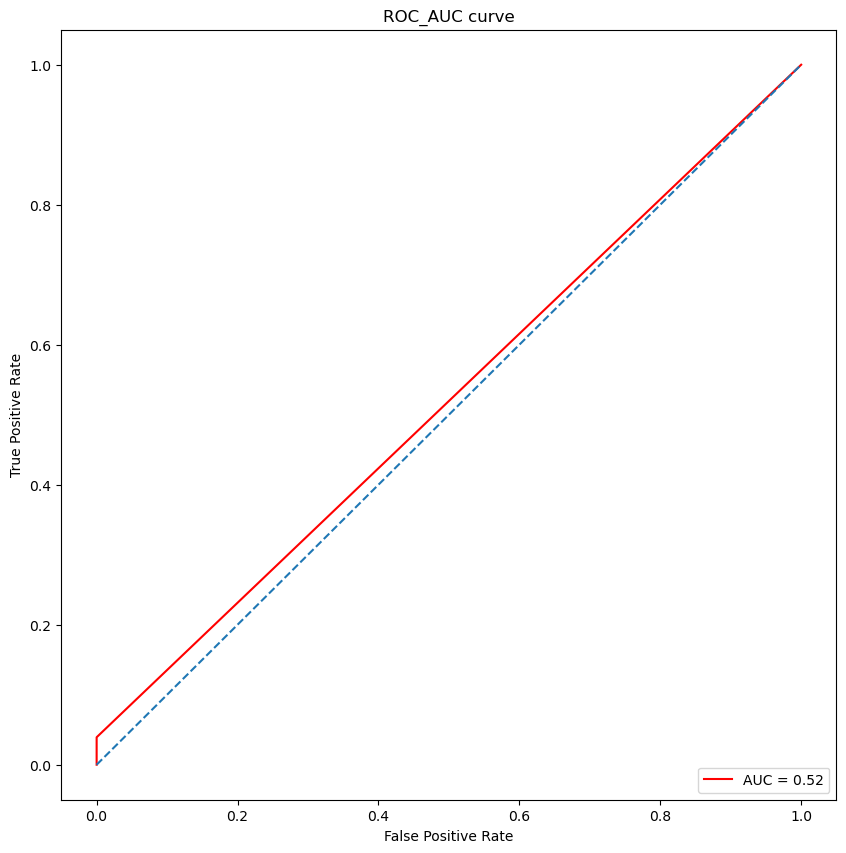

In [71]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC_AUC curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [67]:
#we expand our map
from sklearn.model_selection import GridSearchCV
param_grid = {
    "learning_rate":[0.01,0.05,0.1],  
    'max_depth': [i for i in range(1,30,5)], }
grid_search = GridSearchCV(default_model, param_grid, cv = 3, scoring = 'roc_auc') 

In [72]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 6, 11, 16, 21, 26]},
             scoring='roc_auc')

##Results

In [77]:
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 26}
Meilleur score : 0.8948118789229498


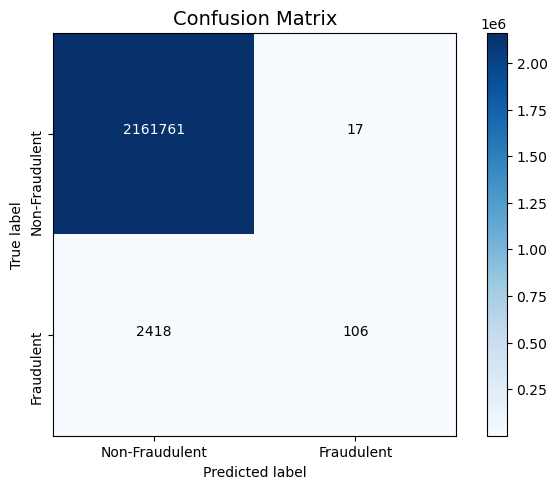

In [75]:
xgbopti = XGBClassifier(random_state=0, learning_rate = 0.1, max_depth = 26, objective= 'binary:logistic')
xgbopti.fit(X_train, y_train)
y_pred = xgbopti.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

Text(0.5, 0, 'False Positive Rate')

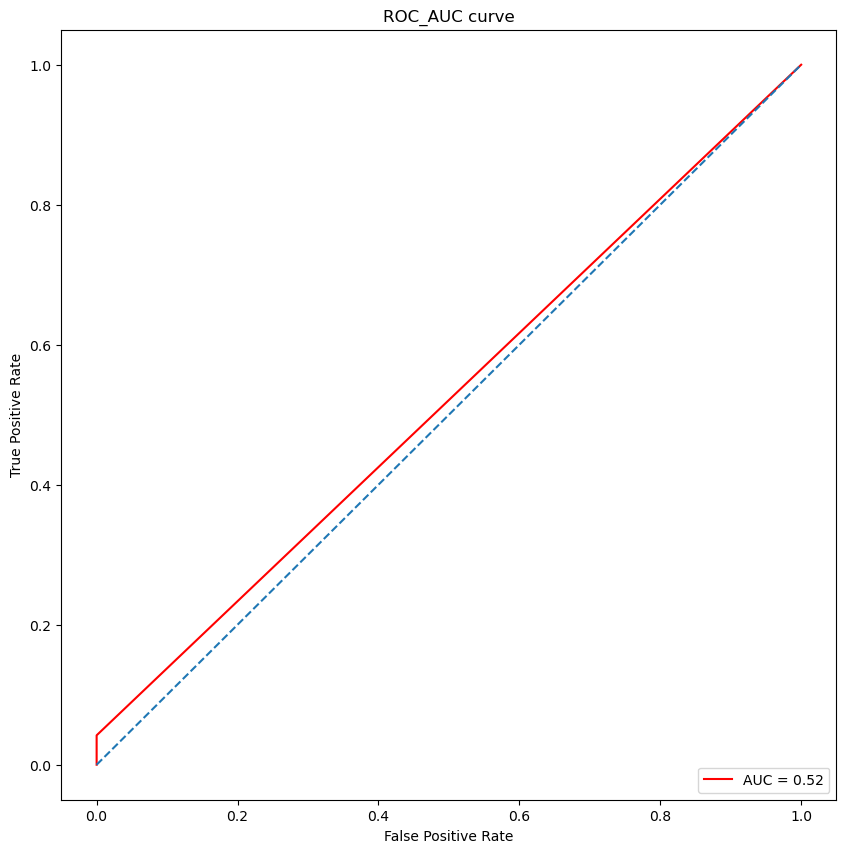

In [76]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC_AUC curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')